# <span style="color:orange"> Assignment 02, Task 2, Weather.<span>
*By Laura Lyons*
***

#### <span style="color:orange">Import Data<span>

A number of imports were used to help with the data analysis and visualisation.

In [13]:
# Data frames
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from datetime import datetime

***
#### <span style="color:orange">Load the Data<span>
The dataset *'weatherreadings1.csv'* was downloaded from PFDA-courseware, which was pulled from [Github](https://github.com/andrewbeattycourseware/PFDA-courseware.git). I copied the file into the my directory, so any alterations made would remain on the copy of the dataset.

In [3]:
# Load the weather data set.
df = pd.read_csv('C:/Users/Laura/OneDrive/ATU_DA/24-25/programming-for-data-analytics/PFDA-assignments/assignment02/weatherreadings1.csv')

In [4]:
# Lets inspect the variable types.
df.dtypes

siteId                             object
reportStartDateTime                object
reportEndDateTime                  object
collectionName                      int64
isPublic                             bool
isLatestVersion                      bool
observationType                     int64
softwareType                       object
windDirection                       int64
relativeHumidity                  float64
windSpeed_MilePerHour             float64
windSpeed_MetrePerSecond          float64
dryBulbTemperature_Fahrenheit     float64
dryBulbTemperature_Celsius        float64
wetBulbTemperature_Fahrenheit     float64
wetBulbTemperature_Celsius        float64
rainfallAmount_Inch                 int64
rainfallAmount_Millimetre           int64
rainfallRate_InchPerHour            int64
rainfallRate_MillimetrePerHour      int64
airPressure_InchOfMercury         float64
airPressure_Hectopascal           float64
dewPointTemperature_Fahrenheit    float64
dewPointTemperature_Celsius       

From the above table we can see that there are 30 variables within the data set, however we are only interested in the variable of '*dryBulbTemperature_Celsius *' over time. We will use the variable *'reportStartDateTime '* as our time reference. This data will need to be manipulated as it contains both the data and time, while we only require the time.

Information on how to complete this data transformation was retrieved using Microsoft CoPilot.

In [5]:
# Convert the 'datetime' column to datetime format
df['datetime'] = pd.to_datetime(df['reportStartDateTime'])

# Extract just the time, and create a new column, sourced from the website: https://stackoverflow.com/questions/35595710/splitting-timestamp-column-into-separate-date-and-time-columns.
df['time'] = df['datetime'].dt.time

# Rename the column
df.rename(columns={'dryBulbTemperature_Celsius': 'temperature'}, inplace=True)

# Save the updated CSV file
df.to_csv('weatherreadings_updated.csv', index=False)


In [17]:
# Define the function to extract time
def extract_time(datetime_str):
    if isinstance(datetime_str, str):
        dt = datetime.fromisoformat(datetime_str)
        return dt.time().strftime('%H:%M')
    else:
        return None

# Apply the function to the 'datetime' column
df['time'] = df['datetime'].apply(extract_time)

# Rename the column
df.rename(columns={'dryBulbTemperature_Celsius': 'temperature'}, inplace=True)

# Save the updated CSV file
df.to_csv('weatherreadings_updated2.csv', index=False)



[Text(0.5, 0, 'time'), Text(0, 0.5, 'temperature')]

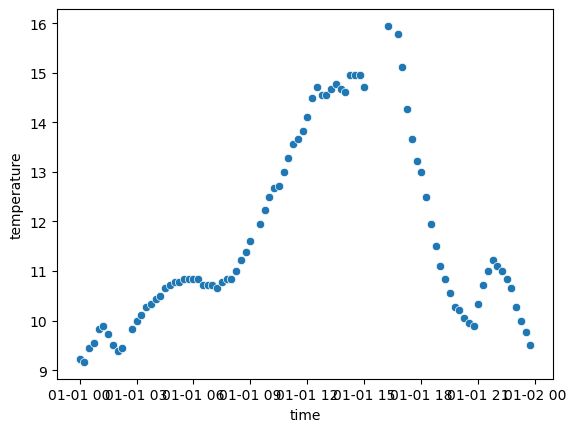

In [23]:
df1 = pd.read_csv('weatherreadings_updated2.csv')
ax = sns.scatterplot(x=df2.index, y=df2["temperature"])
ax.set(xlabel="time", ylabel="temperature")

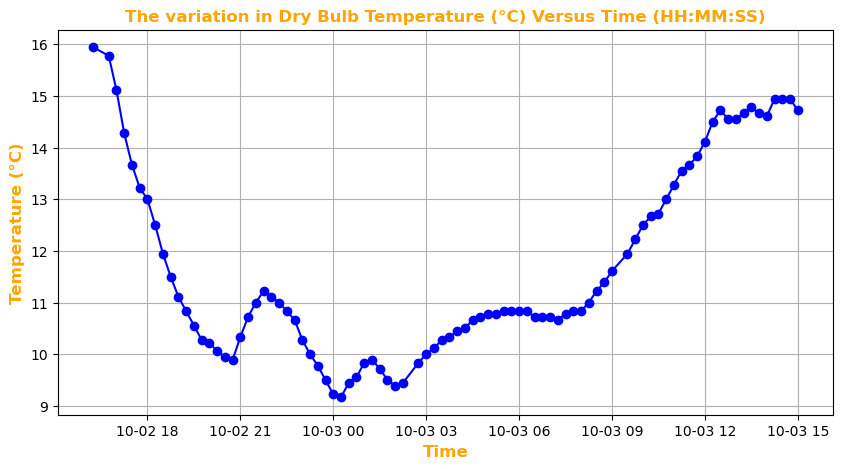

In [19]:
# Plotting the line graph, using Matplotlib.
plt.figure(figsize=(10, 5))
plt.plot(df['datetime'], df['temperature'], marker='o', linestyle='-', color='b')
plt.title('The variation in Dry Bulb Temperature (°C) Versus Time (HH:MM:SS)', fontsize=12, fontweight='bold', color='orange')
plt.xlabel('Time', fontsize=12, fontweight='bold', color='orange')
plt.ylabel('Temperature (°C)', fontsize=12, fontweight='bold', color='orange')
plt.grid(True)
plt.show()

<Axes: xlabel='time', ylabel='temperature'>

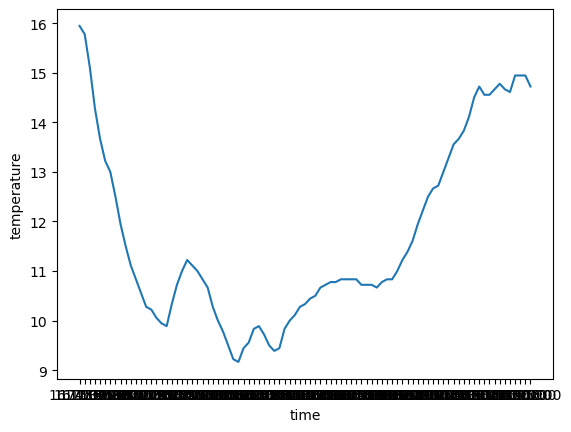

In [7]:
# Lets create a plot using Seaborn
df1= pd.read_csv('C:/Users/Laura/OneDrive/ATU_DA/24-25/programming-for-data-analytics/PFDA-assignments/assignment02/weatherreadings_updated.csv')
sns.lineplot(x='time', y='temperature', data=df1)


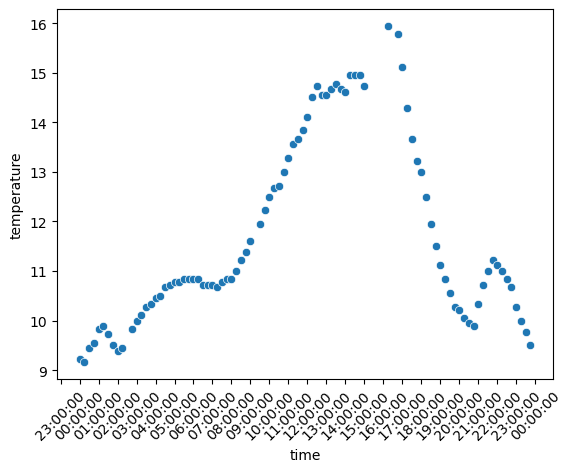

In [26]:
df2= pd.read_csv('C:/Users/Laura/OneDrive/ATU_DA/24-25/programming-for-data-analytics/PFDA-assignments/assignment02/weatherreadings_updated.csv')
df2.time = pd.to_datetime(df2.time, format='%H:%M:%S')
df2.set_index(['time'],inplace=True)
ax = sns.scatterplot(x=df2.index, y=df2["temperature"])
ax.set(xlabel="time", ylabel="temperature")

ax.xaxis.set_major_locator(mdates.HourLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M:%S"))
ax.tick_params(axis="x", rotation=45)

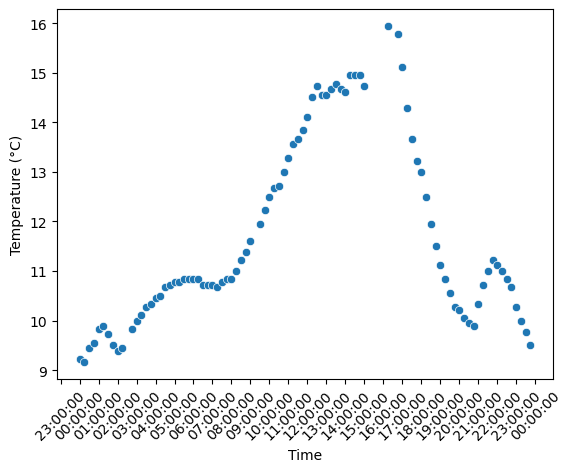

In [28]:
# Load the data DataFrame
df2 = pd.read_csv('weatherreadings_updated.csv')    

# will convert the 'time' column to datetime objects with the specified format.
df2['time'] = pd.to_datetime(df2['time'], format='%H:%M:%S')    
# This code was creating using code from the website: https://stackoverflow.com/questions/35595710/splitting-timestamp-column-into-separate-date-and-time-columns.

# Set 'time' column as index
df2.set_index(['time'], inplace=True)

# Create the scatter plot
ax = sns.scatterplot(x=df2.index, y=df2["temperature"])
ax.set(xlabel="Time", ylabel="Temperature (°C)")

# Format the x-axis
ax.xaxis.set_major_locator(mdates.HourLocator()) # sets the major ticks on the x-axis to be at every hour.
ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M:%S")) # formats the x-axis labels to display time in hours, minutes, and seconds.
ax.tick_params(axis="x", rotation=45) # rotates the x-axis labels by 45 degrees, making it easier to read.
# The above code was created using Microsoft Copilot.

plt.show()
